In [ ]:
# Chapter 5


In [2]:
import numpy as np
from matplotlib import pyplot as plt
np.random.seed(0)


In [3]:
training_input = [[ 1,2,3,2.5] ,
                  [2.0, 5.0, -1.0, 2.0],
                  [-1.5, 2.7, 3.3, -0.8]]

In [4]:

# Rectified Linear Unit (ReLU) is an activation function
inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]
outputs = []

for i in inputs:
    if i > 0:
        outputs.append(i)
    elif i <= 0:
        outputs.append(0)
        
print (outputs)

[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]


In [5]:
class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

In [6]:
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.10 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases
        

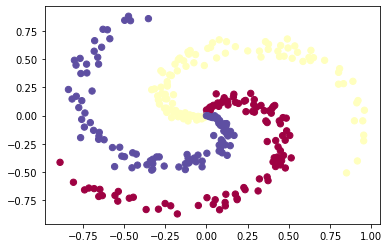

In [7]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()


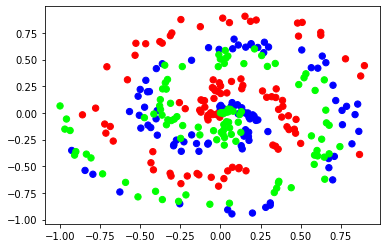

In [8]:
#https://cs231n.github.io/neural-networks-case-study/
def create_data(points, classes):
    X = np.zeros((points*classes, 2))
    y = np.zeros(points*classes, dtype='uint8')
    for class_number in range(classes):
        ix = range(points*class_number, points*(class_number+1))
        r = np.linspace(0.0, 1, points) # radius
        t = np.linspace(class_number*4, (class_number+1)*4, points) + np.random.randn(points)*0.2 # theta
        X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
        y[ix] = class_number
    return X, y

X, y = create_data(100,3)

plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap="brg")
plt.show()

In [9]:
X, y = create_data(100,3)

In [10]:
layer1 = Layer_Dense(2,5)
activation1 = Activation_ReLU()
layer1.forward(X)
#print(layer1.output)
activation1.forward(layer1.output)

print (activation1.output)

[[0.         0.         0.         0.         0.        ]
 [0.00130361 0.         0.         0.00098282 0.00101645]
 [0.00433683 0.         0.         0.00176779 0.00304681]
 ...
 [0.         0.08307725 0.06008281 0.         0.        ]
 [0.20763142 0.         0.         0.08870639 0.14677751]
 [0.13742055 0.07072618 0.         0.         0.07881455]]
